# Лабораторная работа 2. Ассоциативные правила 
## Описание работы
**Цель работы:** исследование методов анализа ассоциативных правил.

**Постановка задачи:**
В файле "ass_rules.pdf" находится программный код для выполнения данной работы. Провести исследование методов анализа ассоциативных правил на датасете с Kaggle:
1. Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ). Данные должны представлять собой информацию о купленных вместе товарах.
2. Привести описание данных из датасета: график вывода длин транзакций, список уникальных товаров и др.
3. Алгоритм Apriori: выполнить анализ ассоциативных правил при помощи алгоритма Apriori с изначальными условиями в соответствии с вариантом задания. Проанализировать полученные результаты, выделив полезные и тривиальные правила, и оценив значение достоверности, лифта правил. Провести оценку влияния параметров алгоритма на получаемые правила (на количество правил и метрики).
4. Алгоритм FPG: провести анализ правил, используя алгоритм FPG. В отчете привести правила, получившиеся в результате использования данного алгоритма.
5. Алгоритмически определить минимальные значения поддержки для составления правил из 1, 2, и т.д. объектов в одном из алгоритмов.
6. Последовательно меняя параметры (значения поддержки и достоверности) одного из алгоритмов получить наборы ассоциативных правил. Сделать выводы на основе проведенных экспериментов.
7. Проанализировать получающийся в результате работы программы граф. Объяснить, какую информацию можно из него извлечь.
8. Предложить и реализовать свой способ визуализации ассоциативных правил и метрик.


### Загрузка данных

In [11]:
import pandas as pd

df = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

print("Размерность датасета:", df.shape)
df.head(10)


Размерность датасета: (7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Анализ данных

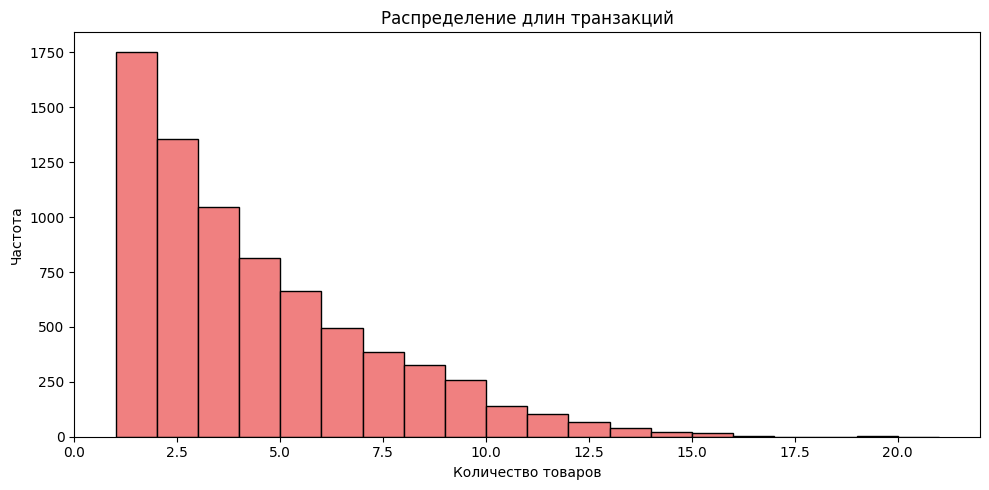

Средняя длина транзакции: 3.914544727369684
Максимальная длина транзакции: 20


In [12]:
import matplotlib.pyplot as plt

df.describe()

tr_len = df.notnull().sum(axis=1)

plt.figure(figsize=(10,5))
plt.hist(tr_len, bins=range(1, max(tr_len)+2), edgecolor='black', color='lightcoral')
plt.title('Распределение длин транзакций')
plt.xlabel('Количество товаров')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

print("Средняя длина транзакции:", tr_len.mean())
print("Максимальная длина транзакции:", tr_len.max())


Гистограмма показывает распределение количества товаров в транзакциях. Средний чек - около 4 товаров, максимальный - 20 товаров. Пик частоты приходится на транзакции, содержащие от 1 до 5 товаров.

Такое распределение типично для супермаркета - преобладают небольшие ежедневные покупки, редкие крупные закупки. Это важно для настройки параметров алгоритмов: низкий min_support позволит выявить паттерны в небольших транзакциях, но может создать шум.



### Анализ общего ассортимента товаров

In [16]:
import numpy as np

np_data = df.to_numpy()
np_data = [[elem for elem in row if isinstance(elem, str)] for row in np_data]

unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

print("Количество уникальных товаров:", len(unique_items))
list(unique_items)[:20] 


Количество уникальных товаров: 120


['clothes accessories',
 'barbecue sauce',
 'spaghetti',
 'pet food',
 'almonds',
 'hot dogs',
 'french fries',
 'pancakes',
 'toothpaste',
 'honey',
 'strong cheese',
 'cereals',
 'gums',
 'carrots',
 'nonfat milk',
 'mineral water',
 'chicken',
 'oatmeal',
 'mushroom cream sauce',
 'light mayo']

Общий ассортимент датасета составляет 120 уникальных товарных наименований.

Список товаров является разнородным и включает продукты питания различной категории (например, 'spaghetti', 'chicken', 'nonfat milk'), товары для дома ('toothpaste'), а также товары для животных ('pet food').

Этот шаг является подготовкой данных к применению алгоритмов ассоциативных правил, так как эти 120 товаров будут выступать в качестве наборов элементов. Полученный список будет использоваться для последующего преобразования данных в бинарную матрицу, где каждый столбец представляет отдельный товар.
### Подготовка данных для анализа - преобразование в бинарный формат

In [18]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit_transform(np_data)
data = pd.DataFrame(te_data, columns=te.columns_)

data.head(10)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Каждая строка представляет отдельную транзакцию (покупку), а каждый столбец соответствует одному из 120 уникальных товаров.

Ячейка содержит True (или 1), если товар присутствовал в данной транзакции, и False (или 0) в противном случае.

### Анализ популярности товаров

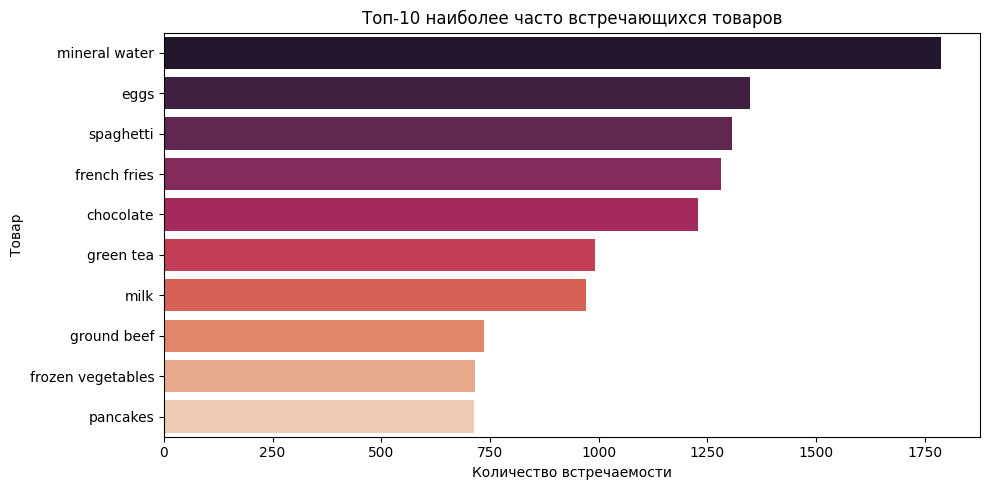

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64

In [ ]:
import seaborn as sns

top_items = data.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_items.values,
    y=top_items.index,
    hue=top_items.index,
    dodge=False,
    legend=False,
    palette='rocket'
)
plt.title('Топ-10 наиболее часто встречающихся товаров')
plt.xlabel('Количество встречаемости')
plt.ylabel('Товар')
plt.tight_layout()
plt.show()

top_items


Визуализация демонстрирует рейтинг самых популярных товаров в датасете, что является важным этапом для понимания структуры продаж и планирования дальнейшего анализа:
* **Абсолютный лидер** - "mineral water", которая встречается в 1788 транзакциях, значительно опережая другие товары.
* **Основная группа популярных товаров** включает базовые продукты питания: "eggs", "spaghetti", "french fries", "chocolate".
* **Напитки и повседневные продукты** также хорошо представлены в топ-10: "green tea", "milk".

Самый популярный товар встречается примерно в 1788/7500 ≈ 24% транзакций. Для поиска правил, включающих несколько товаров, потребуется установить значительно более низкий порог поддержки, чтобы охватить менее частые, но потенциально значимые комбинации.
### Алгоритм Apriori с минимальной поддержкой 0.02

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_02 = apriori(data, min_support=0.02, use_colnames=True)

print("Количество наборов (min_support = 0.02):", len(frequent_itemsets_02))
frequent_itemsets_02.head(10)


Количество наборов (min_support = 0.02): 103


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
5,0.081056,(cake)
6,0.025730,(cereals)
7,0.046794,(champagne)
8,0.059992,(chicken)
9,0.163845,(chocolate)


Общее количество найденных наборов составляет 103, что включает как **одиночные товары**, так и их комбинации. Заметим, что в таблице только одиночные товары, поэтому для анализа именно комбинационных покупок необходимо отфильтровать наборы, содержащие 2 и более товара.



In [ ]:
frequent_itemsets_2plus = frequent_itemsets_02[frequent_itemsets_02['itemsets'].apply(lambda x: len(x) >= 2)]

print("Количество наборов из 2+ товаров:", len(frequent_itemsets_2plus))
frequent_itemsets_2plus.head(10)

Количество наборов из 2+ товаров: 50


,support,itemsets,itemsets_str,length
53,0.028796,"(burgers, eggs)","burgers, eggs",2
54,0.021997,"(french fries, burgers)","french fries, burgers",2
55,0.024397,"(burgers, mineral water)","burgers, mineral water",2
56,0.021464,"(burgers, spaghetti)","burgers, spaghetti",2
57,0.027463,"(cake, mineral water)","cake, mineral water",2
58,0.022797,"(mineral water, chicken)","mineral water, chicken",2
59,0.033196,"(chocolate, eggs)","chocolate, eggs",2
60,0.034395,"(french fries, chocolate)","french fries, chocolate",2
61,0.022930,"(frozen vegetables, chocolate)","frozen vegetables, chocolate",2
62,0.023464,"(green tea, chocolate)","green tea, chocolate",2


### Генерация ассоциативных правил с минимальной достоверностью 0.25

На основе найденных частых наборов алгоритм Apriori сгенерировал ассоциативные правила с минимальной достоверностью 0.25.

In [31]:
rules_02 = association_rules(frequent_itemsets_02, metric="confidence", min_threshold=0.25)

print("Количество правил:", len(rules_02))

rules_02[['antecedents','consequents','support','confidence','lift']].head(10)


Количество правил: 28


,antecedents,consequents,support,confidence,lift
0,(burgers),(eggs),0.028796,0.330275,1.837830
1,(burgers),(french fries),0.021997,0.252294,1.476173
2,(burgers),(mineral water),0.024397,0.279817,1.173883
3,(cake),(mineral water),0.027463,0.338816,1.421397
4,(chicken),(mineral water),0.022797,0.380000,1.594172
5,(chocolate),(mineral water),0.052660,0.321400,1.348332
6,(cooking oil),(mineral water),0.020131,0.394256,1.653978
7,(eggs),(mineral water),0.050927,0.283383,1.188845
8,(frozen smoothie),(mineral water),0.020264,0.320000,1.342461
9,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463


Структура правил демонстрирует типичные паттерны покупок, где минеральная вода часто выступает в качестве консеквента (следствия) в комбинации с различными продуктами.
* Достоверность (confidence): варьируется от 0.25 до 0.39, что означает вероятность от 25% до 39% покупки следствия при наличии антецедента
* Лифт (lift): значения от 1.17 до 1.84 показывают, что найденные взаимосвязи сильнее случайных (lift > 1)
* Пример сильного правила: (chicken) → (mineral water) имеет достоверность 38% и лифт 1.59, что указывает на значимую связь
### Анализ самых частых товарных пар
Выполнена фильтрация и визуализация только товарных наборов, что позволяет видеть реальные комбинации покупок.

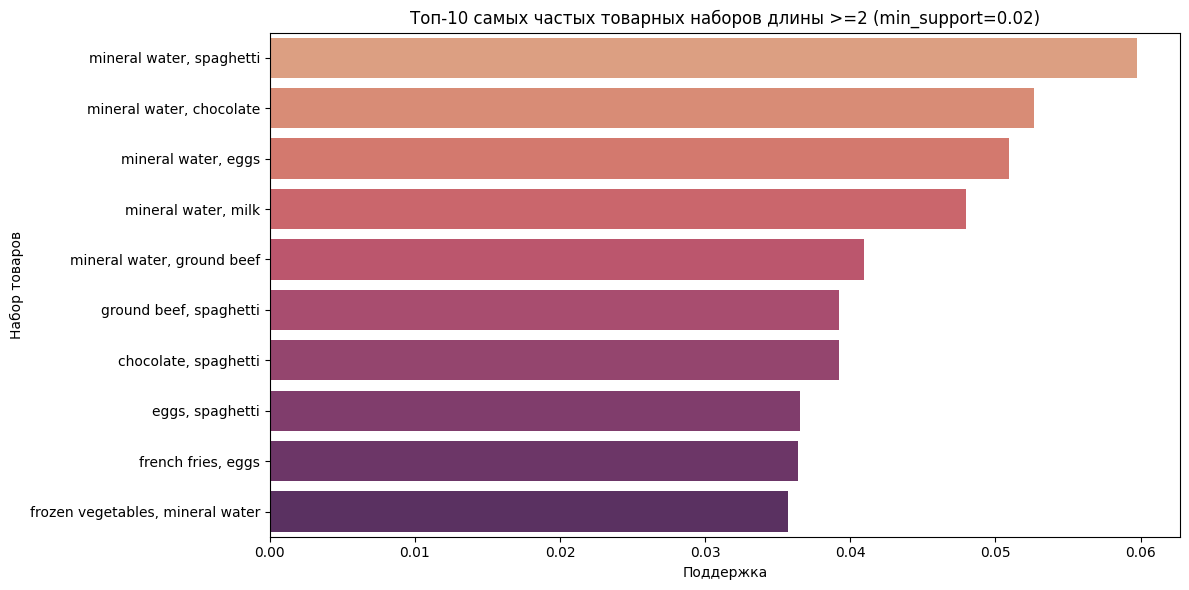

,support,itemsets,itemsets_str,length
96,0.059725,"(mineral water, spaghetti)","mineral water, spaghetti",2
65,0.052660,"(mineral water, chocolate)","mineral water, chocolate",2
72,0.050927,"(mineral water, eggs)","mineral water, eggs",2
90,0.047994,"(mineral water, milk)","mineral water, milk",2
87,0.040928,"(mineral water, ground beef)","mineral water, ground beef",2
88,0.039195,"(ground beef, spaghetti)","ground beef, spaghetti",2
66,0.039195,"(chocolate, spaghetti)","chocolate, spaghetti",2
74,0.036528,"(eggs, spaghetti)","eggs, spaghetti",2
68,0.036395,"(french fries, eggs)","french fries, eggs",2
82,0.035729,"(frozen vegetables, mineral water)","frozen vegetables, mineral water",2


In [28]:
frequent_itemsets_02['itemsets_str'] = frequent_itemsets_02['itemsets'].apply(lambda x: ', '.join(list(x)))
frequent_itemsets_02['length'] = frequent_itemsets_02['itemsets'].apply(len)

top_sets = frequent_itemsets_02[frequent_itemsets_02['length'] >= 2] \
            .sort_values(by='support', ascending=False) \
            .head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_sets,
    x='support',
    y='itemsets_str',
    hue='itemsets_str',
    palette='flare',
    legend=False
)
plt.title('Топ-10 самых частых товарных наборов длины >=2 (min_support=0.02)')
plt.xlabel('Поддержка')
plt.ylabel('Набор товаров')
plt.tight_layout()
plt.show()

top_sets


* Минеральная вода - ключевой товар для кросс-продаж: она присутствует в 7 из 10 самых популярных пар, сочетаясь с основными продуктами питания (спагетти, шоколад, яйца, молоко, мясо).
* Наиболее сильная связь: комбинация "минеральная вода + спагетти" имеет самую высокую поддержку (≈6%), что означает, что эти два товара вместе встречаются примерно в каждой 17-й транзакции.
* Типичные продуктовые пары: обнаружены логичные сочетания продуктов для готовки - "мясной фарш + спагетти", "яйца + спагетти", "яйца + картофель фри".
### Анализ и визуализация качества ассоциативных правил

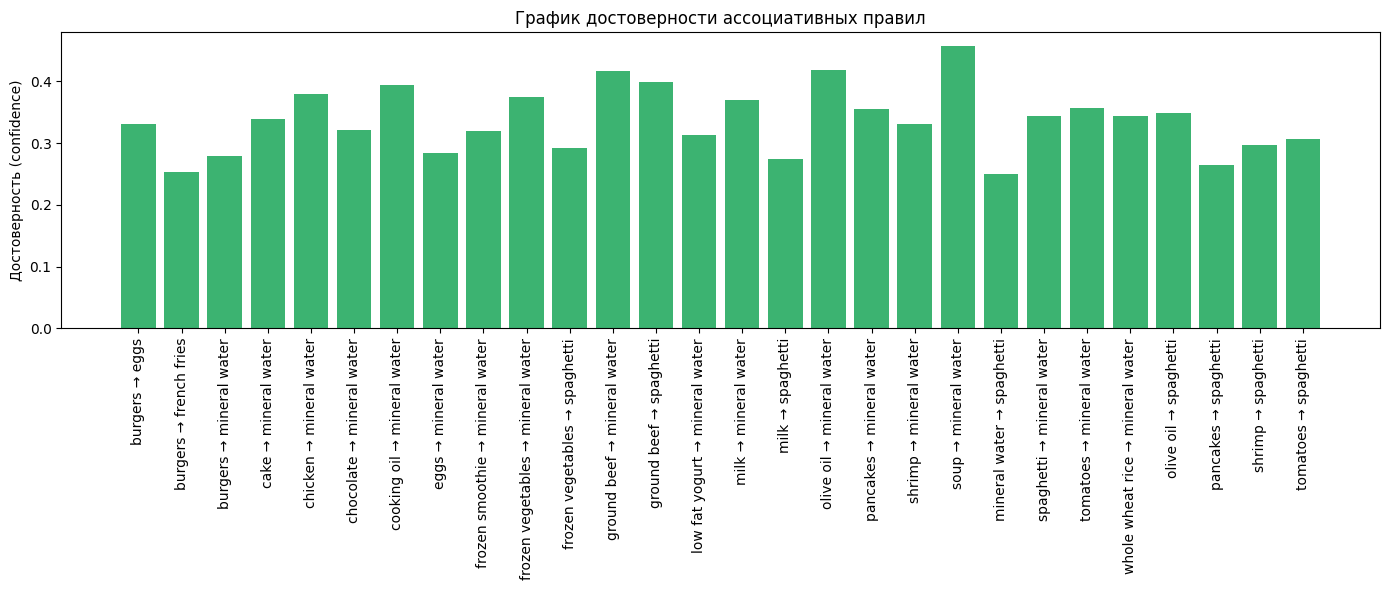

In [32]:
rules_02['antecedents_str'] = rules_02['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_02['consequents_str'] = rules_02['consequents'].apply(lambda x: ', '.join(list(x)))

labels = [f"{a} → {c}" for a, c in zip(rules_02['antecedents_str'], rules_02['consequents_str'])]

plt.figure(figsize=(14,6))
plt.bar(
    labels,
    rules_02['confidence'],
    color='mediumseagreen'
)
plt.xticks(rotation=90)
plt.ylabel('Достоверность (confidence)')
plt.title('График достоверности ассоциативных правил')
plt.tight_layout()
plt.show()


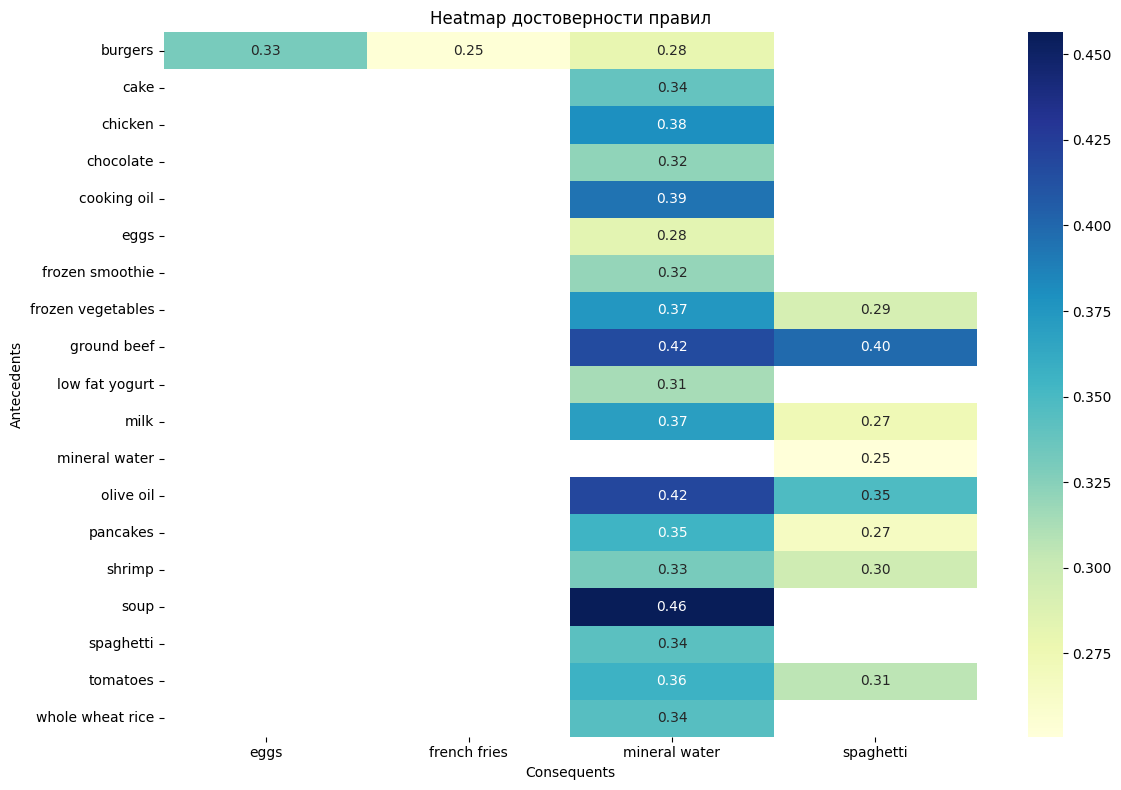

consequents_str,eggs,french fries,mineral water,spaghetti
antecedents_str,,,,
burgers,0.330275,0.252294,0.279817,NaN
cake,NaN,NaN,0.338816,NaN
chicken,NaN,NaN,0.380000,NaN
chocolate,NaN,NaN,0.321400,NaN
cooking oil,NaN,NaN,0.394256,NaN
eggs,NaN,NaN,0.283383,NaN
frozen smoothie,NaN,NaN,0.320000,NaN
frozen vegetables,NaN,NaN,0.374825,0.292308
ground beef,NaN,NaN,0.416554,0.398915


In [40]:
heat_conf = rules_02.pivot(
    index='antecedents_str',
    columns='consequents_str',
    values='confidence'
)

plt.figure(figsize=(12,8))
sns.heatmap(heat_conf, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap достоверности правил')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.tight_layout()
plt.show()

heat_conf

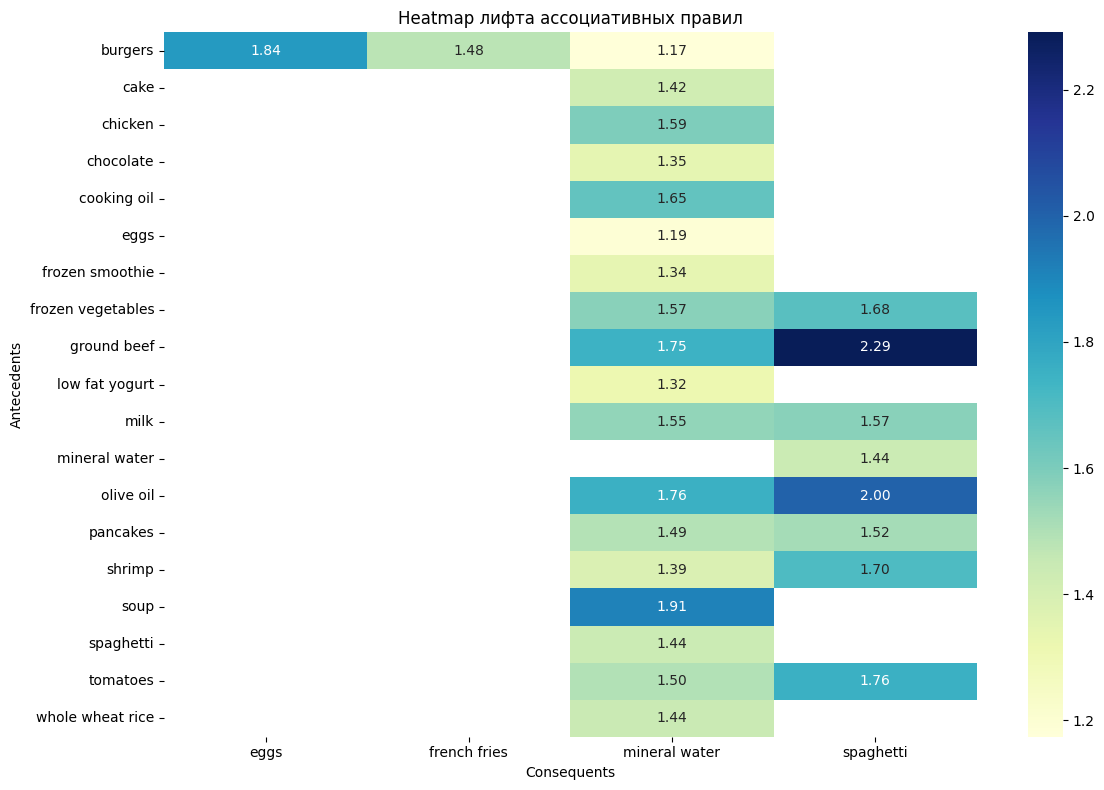

consequents_str,eggs,french fries,mineral water,spaghetti
antecedents_str,,,,
burgers,1.83783,1.476173,1.173883,NaN
cake,NaN,NaN,1.421397,NaN
chicken,NaN,NaN,1.594172,NaN
chocolate,NaN,NaN,1.348332,NaN
cooking oil,NaN,NaN,1.653978,NaN
eggs,NaN,NaN,1.188845,NaN
frozen smoothie,NaN,NaN,1.342461,NaN
frozen vegetables,NaN,NaN,1.572463,1.678867
ground beef,NaN,NaN,1.747522,2.291162


In [67]:
heat_lift = rules_02.pivot(
    index='antecedents_str',
    columns='consequents_str',
    values='lift'
)

plt.figure(figsize=(12,8))
sns.heatmap(heat_lift, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap лифта ассоциативных правил')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.tight_layout()
plt.show()


heat_lift

* График достоверности показал абсолютные значения предсказательной силы правил, где выделились связи с минеральной водой, особенно правила soup → mineral water (45.6%) и olive oil → mineral water (41.9%).
* Heatmap достоверности предоставил матричное представление, выявившее паттерны многосторонних связей - некоторые товары (оливковое масло, мясной фарш, замороженные овощи) образуют ассоциации одновременно с минеральной водой и спагетти.
* Heatmap лифта продемонстрировал статистическую значимость правил, подтвердив, что наиболее сильные ассоциации (soup → mineral water - лифт 1.91, ground beef → spaghetti - лифт 2.29) действительно являются нетривиальными и не случайными.

Правило soup → mineral water, хотя и не вошло в топ по поддержке (из-за относительно редкой покупки супа), оказалось наиболее значимым по обеим метрикам качества - как по достоверности (45.6%), так и по лифту (1.91). Это указывает на ценную, хотя и не самую частую, поведенческую закономерность.
### Сетевая визуализация ассоциативных правил

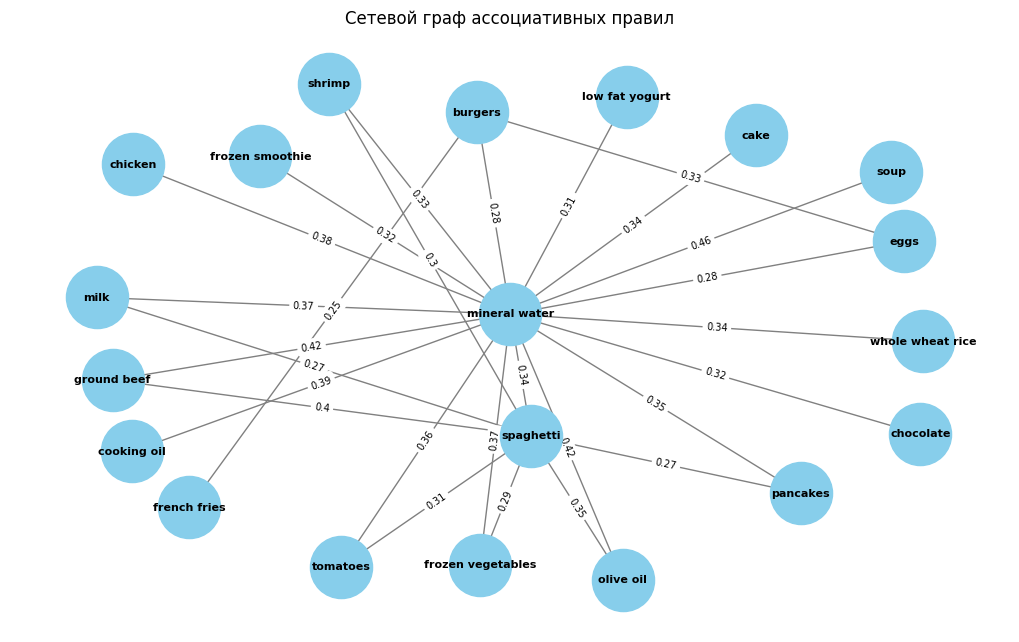

In [61]:
import networkx as nx
plt.figure(figsize=(10, 6))

G = nx.from_pandas_edgelist(
    rules_02,
    source='antecedents_str',
    target='consequents_str',
    edge_attr='confidence'
)

pos = nx.spring_layout(G, seed=42, k = 2, iterations = 50)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=2000,
    node_color='skyblue',
    font_size=8,
    font_weight='bold',
    edge_color='gray'
)

edge_labels = nx.get_edge_attributes(G, 'confidence')
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={k: round(v, 2) for k, v in edge_labels.items()},
    font_size=7
)

plt.title('Сетевой граф ассоциативных правил')
plt.show()


Граф подтверждает, что mineral water и spaghetti являются ключевыми товарами-маркерами в корзине покупок. Покупатели часто добавляют их к другим продуктам.

### Определение минимальной поддержки для наборов разной длины

In [44]:
df_len = frequent_itemsets_02.copy()
df_len['length'] = df_len['itemsets'].apply(lambda x: len(x))

min_support_by_len = df_len.groupby('length')['support'].min()

print("Минимальная поддержка по длинам наборов:")
min_support_by_len


Минимальная поддержка по длинам наборов:


length
1    0.020397
2    0.020131
Name: support, dtype: float64

Минимальные значения поддержки для наборов различной длины находятся в близком диапазоне (2.0-2.04%). Отсутствие наборов длиной 3 и более товаров говорит о том, что заданное пороговое значение поддержки (0.02) является предельным для выявления сложных товарных комбинаций.
### Алгоритм FPGrowth 

In [64]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fpg = fpgrowth(data, min_support=0.02, use_colnames=True)
rules_fpg = association_rules(frequent_itemsets_fpg, min_threshold=0.25)

print("FPGrowth — количество правил:", len(rules_fpg))
rules_fpg[['antecedents','consequents','support','confidence','lift']].head(10)


FPGrowth — количество правил: 28


,antecedents,consequents,support,confidence,lift
0,(low fat yogurt),(mineral water),0.023997,0.313589,1.315565
1,(shrimp),(mineral water),0.023597,0.330224,1.385352
2,(shrimp),(spaghetti),0.021197,0.296642,1.703760
3,(olive oil),(mineral water),0.027596,0.419028,1.757904
4,(olive oil),(spaghetti),0.022930,0.348178,1.999758
5,(frozen smoothie),(mineral water),0.020264,0.320000,1.342461
6,(eggs),(mineral water),0.050927,0.283383,1.188845
7,(burgers),(eggs),0.028796,0.330275,1.837830
8,(burgers),(mineral water),0.024397,0.279817,1.173883
9,(burgers),(french fries),0.021997,0.252294,1.476173


Количество правил идентично: FPGrowth сгенерировал то же количество правил (28), что и алгоритм Apriori, что подтверждает корректность работы обоих алгоритмов.

Структура правил совпадает: Первые 10 правил полностью соответствуют результатам Apriori, включая одинаковые значения поддержки, достоверности и лифта:
* (low fat yogurt) → (mineral water) - поддержка 2.4%, достоверность 31.4%
* (olive oil) → (mineral water) - поддержка 2.8%, достоверность 41.9%
* (burgers) → (eggs) - поддержка 2.9%, достоверность 33.0%
### Визуализация метрики лифта для ассоциативных правил (алгоритм FPGrowth)

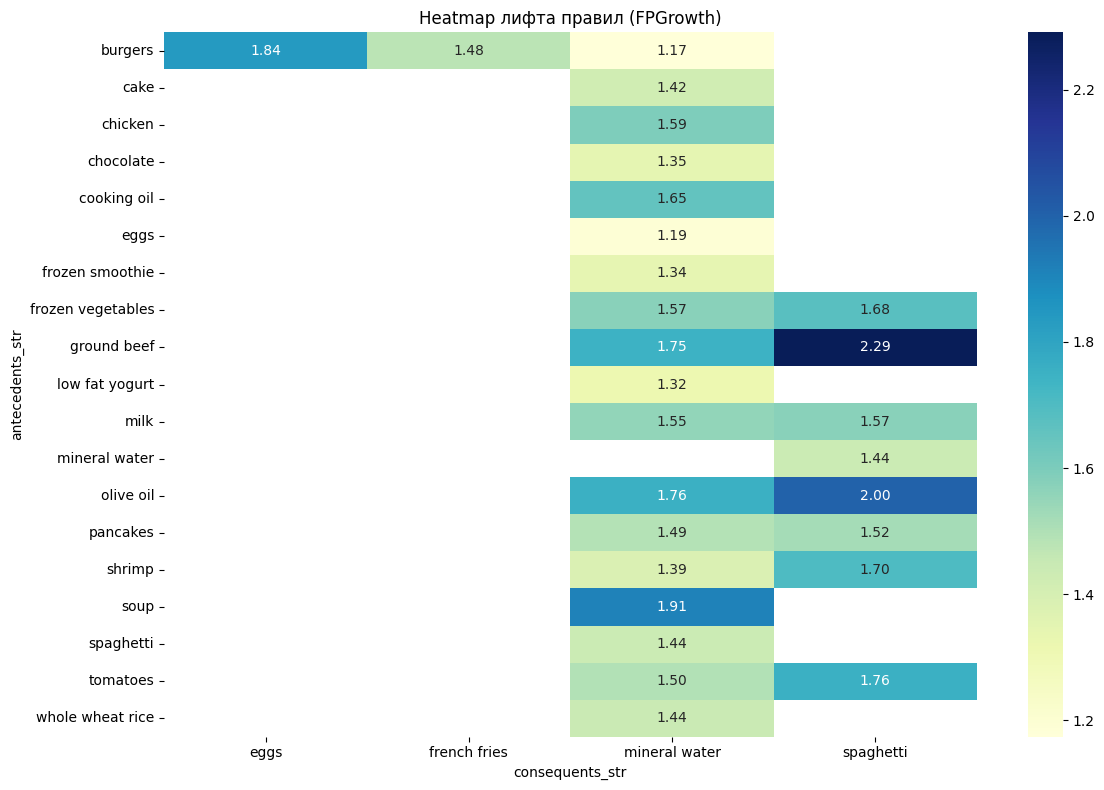

consequents_str,eggs,french fries,mineral water,spaghetti
antecedents_str,,,,
burgers,1.83783,1.476173,1.173883,NaN
cake,NaN,NaN,1.421397,NaN
chicken,NaN,NaN,1.594172,NaN
chocolate,NaN,NaN,1.348332,NaN
cooking oil,NaN,NaN,1.653978,NaN
eggs,NaN,NaN,1.188845,NaN
frozen smoothie,NaN,NaN,1.342461,NaN
frozen vegetables,NaN,NaN,1.572463,1.678867
ground beef,NaN,NaN,1.747522,2.291162


In [65]:
rules_fpg['antecedents_str'] = rules_fpg['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_fpg['consequents_str'] = rules_fpg['consequents'].apply(lambda x: ', '.join(list(x)))

heat_lift_fpg = rules_fpg.pivot(
    index='antecedents_str',
    columns='consequents_str',
    values='lift'
)

plt.figure(figsize=(12,8))
sns.heatmap(heat_lift_fpg, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap лифта правил (FPGrowth)')
plt.tight_layout()
plt.show()

heat_lift_fpg


Тепловая карта лифта для правил, полученных алгоритмом FPGrowth, полностью подтверждает результаты предыдущего анализа с Apriori:
* Полное совпадение метрик: Все значения лифта идентичны результатам алгоритма Apriori, включая:
 * Максимальный лифт: soup → mineral water (1.91)
 * Сильные связи: ground beef → spaghetti (2.29), olive oil → spaghetti (2.00)
 * Умеренные ассоциации: frozen vegetables → spaghetti (1.68), shrimp → spaghetti (1.70)
* Идентичная структура связей: Распределение правил по антецедентам и консеквентам полностью повторяет предыдущие результаты, подтверждая воспроизводимость анализа.
* Стабильность паттернов: Наблюдается та же концентрация связей с минеральной водой и спагетти как основными консеквентами.

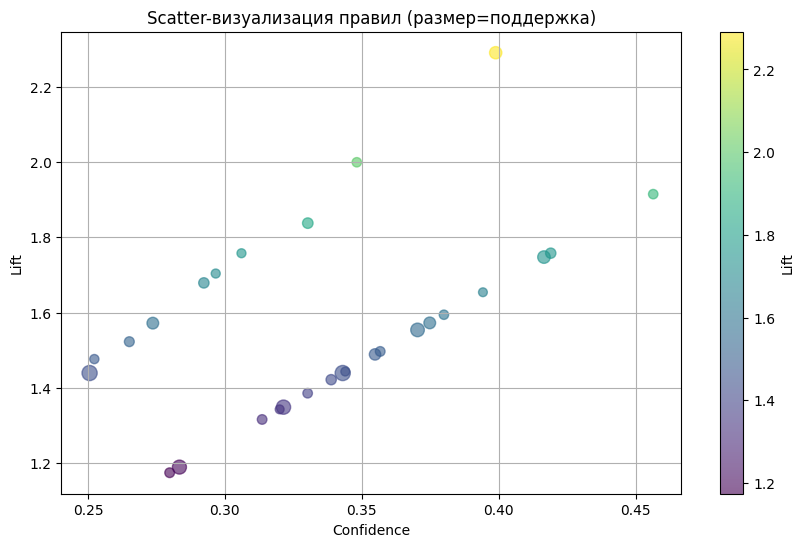

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(
    rules_02['confidence'],
    rules_02['lift'],
    s = rules_02['support'] * 2000,
    alpha=0.6,
    c=rules_02['lift'],
    cmap='viridis'
)

plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Scatter-визуализация правил (размер=поддержка)')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()


Scatter-диаграмма, отображающая зависимость между достоверностью правил (confidence) и силой взаимосвязи (lift), показала, что найденные правила формируют **две отчётливо различимые группы (кластера)**. Это отражает различные уровни статистической значимости связей между товарами.

**Нижняя линия (кластер слабых правил)**
Первая линия точек соответствует правилам с **умеренными или слабыми значениями лифта** (примерно 1.15–1.45).  
Несмотря на то, что уровень достоверности может сильно варьироваться, сила взаимосвязи остаётся почти постоянной.  
Такие правила представляют **фоновые закономерности**, возникающие вследствие общей популярности отдельных товаров и не несущие значимой аналитической ценности.

**Верхняя линия (кластер устойчивых сильных правил)**
Вторая, более высокая линия точек формируется правилами с **существенно более высоким лифтом** (примерно 1.6–2.3).  
В этом кластере наблюдается тенденция: чем выше достоверность правила, тем выше и его лифт.  
Эти зависимости представляют собой **сильные и устойчивые ассоциации**, например:  
- ground beef → spaghetti
- olive oil → spaghetti 
- soup → mineral water  

Эти правила обладают как высокой достоверностью, так и выраженной статистической значимостью.


Разделение правил на два уровня демонстрирует структуру закономерностей в данных:
- часть связей — **случайные или слабые комбинации**,  
- другая часть — **стабильные и ценные для анализа ассоциации**, которые могут быть использованы в практике (рекомендации, маркетинговые решения, анализ поведения покупателей).


Scatter-визуализация наглядно показала, что ассоциативные правила в датасете распределяются не хаотично, а формируют два устойчивых кластера.  
Это подтверждает корректность алгоритма и позволяет выделить правила, имеющие реальную практическую значимость.


### Анализ влияния минимальной поддержки на результаты
Проведен эксперимент по изменению параметра минимальной поддержки (min_support) для оценки его влияния на количество найденных наборов и правил.

In [48]:
supports = [0.04, 0.03, 0.02]
results = {}

for sup in supports:
    freq = apriori(data, min_support=sup, use_colnames=True)
    rules_tmp = association_rules(freq, metric='confidence', min_threshold=0.25)
    results[sup] = {
        "itemsets": len(freq),
        "rules": len(rules_tmp)
    }

results


{0.04: {'itemsets': 35, 'rules': 6},
 0.03: {'itemsets': 54, 'rules': 10},
 0.02: {'itemsets': 103, 'rules': 28}}

Результат эксперимента:

| Min Support | Количество наборов | Количество правил |
|-------------|-------------------|-------------------|
|    0.04     |        35         |         6         |
|    0.03     |        54         |        10         |
|    0.02     |        103        |        28         |

При уменьшении минимальной поддержки количество найденных наборов и правил значительно возрастает

При поддержке 0.04 алгоритм находит только 6 наиболее частых и надежных правил, тогда как при 0.02 - уже 28 правил

Снижение поддержки с 0.03 до 0.02 (всего на 0.01) приводит к почти трехкратному увеличению количества правил